# Solusi Numerik untuk Sistem Persamaan Linear

Suatu sistem persamaan linear (SPL) adalah kumpulan dari sejumlah $n$ persamaan atau secara matematis dapat ditulis

$$
\begin{array}{cc}
E_1: & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1, \\
E_2: & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2, \\
E_3: & a_{31}x_1 + a_{32}x_2 + \cdots + a_{3n}x_n = b_3, \\
    & \vdots \\
E_n: & a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = b_n, \\
\end{array}
(1)
$$

Di dalam (1), terdapat koefisien $a_{ij}$, untuk $i,j = 1,2, \cdots, n$, dan $b_i$, dan kita perlu untuk mencari unknowns $x_1, x_2,\cdots, x_n$. SPL (1) juga dapat ditulis dalam bentuk matriks-vektor yaitu

$$A\vec{x} = \vec{b},$$

dimana $A \in \mathbb{R}^{n \times n}$, $\vec{x} \in \mathbb{R}^n$, dan $\vec{b} \in \mathbb{R}^n$.



Terdapat dua cara untuk menyelesaikan (1) menggunakan solusi numerik:
1. Metode Langsung (Naive) (fokus pada analisa error pembulatan)
2. Metode Iteratif

Selain mencari $\vec{x}$, permasalahan yang ada di dalam SPL meliputi:
1. Determinan dari matriks
2. Invers dari matriks
3. Tipe-tipe khusus dari matriks:
  * Matriks Definit Positif
  * Matriks Tridiagonal

Beberapa metode yang akan dipelajari antara lain:
1. Eliminasi Gauss
2. Partial Pivoting
3. Faktorisasi Matriks
  * Dekomposisi LU
  * Matriks Permutasi
  * Cholesky
  * Faktorisasi Crout

## Sistem Persamaan Linear

Kita menggunakan tiga operasi baris untuk menyederhanakan SPL (1):
1. Persamaan $E_i$ dapat __dikali__ oleh suatu konstanta $\lambda$ yang __tak nol__,yang hasilnya ditempatkan di $E_i$. Operasi tersebut dinotasikan sebagai $(\lambda E_i) \rightarrow (E_i)$.
2. Persamaan $E_j$ dapat __dikali__ oleh suatu konstanta $\lambda$ dan __ditambahkan__ ke persamaan $E_i$, yang hasilnya ditempatkan di $E_i$. Operasi ini dapat dinotasikan sebagai $(E_i + \lambda E_j) \rightarrow (E_i)$.
3. Persamaan $E_i$ dan $E_j$ dapat __ditukar__ urutannya atau dapat ditulis $(E_i) \leftrightarrow (E_j)$.

### Contoh 1:
Diberikan SPL

$$
\begin{array}{cc}
E_1: & x_1 &+& x_2 &&  &+& 3x_4 &=& 4, \\
E_2: & 2x_1 &+& x_2 &-& x_3 &+& x_4 &=& 1, \\
E_3: & 3x_1 &-& x_2 &-& x_3 &+& 2x_4 &=& -3, \\
E_4: & -x_1 &+& 2x_2 &+& 3x_3 &-& x_4 &=& 4. \\
\end{array}
$$

Tujuannya adalah mencari nilai dari $x_1, x_2, x_3$, dan $x_4$.

Pertama, kita eliminasi $x_1$ dari persamaan $E_2, E_3$, dan $E_4$ dengan cara:
* $(E_2-2E_1)\rightarrow(E_2)$
* $(E_3-3E_1)\rightarrow(E_3)$
* $(E_4+E_1)\rightarrow(E_4)$

akan menghasilkan sistem persamaan baru

$$
\begin{array}{cc}
E_1: & x_1 &+& x_2 &&  &+& 3x_4 &=& 4, \\
E_2: &  &-& x_2 &-& x_3 &-& 5x_4 &=& -7, \\
E_3: &  &-& 4x_2 &-& x_3 &-& 7x_4 &=& -15, \\
E_4: &  && 3x_2 &+& 3x_3 &+& 2x_4 &=& 8. \\
\end{array}
$$

Di dalam sistem persamaan baru ini, kemudian, kita eliminasi $x_2$ dari $E_3$ dan $E_4$ dengan cara:
* $(E_3-4E_2)\rightarrow(E_3)$
* $(E_4+3E_2)\rightarrow(E_4)$,

sehingga menghasilkan

$$
\begin{array}{cc}
E_1: & x_1 &+& x_2 &&  &+& 3x_4 &=& 4, \\
E_2: &  &-& x_2 &-& x_3 &-& 5x_4 &=& -7, \\
E_3: &  && &-& 3x_3 &+& 13x_4 &=& 13, \\
E_4: &  && &&  &-& 13x_4 &=& -13. \\
\end{array}
(2)
$$

SPL (2) sudah menjadi __bentuk tereduksi__ dan untuk mencari nilai unknowns tersebut digunakan proses __subtitusi mundur__. Karena $E_4$ bernilai $x_4 = 1$, kita selesaikan $E_3$ untuk mencari $x_3$

$$
x_3 = \frac{1}{3}(13-13x_4) = \frac{1}{3}(13-13) = 0.
$$

Dilanjutkan untuk $E_2$

$$
x_2 = -(-7 + 5x_4 + x_3) = -(-7 + 5 + 0) = 2,
$$

dan $E_1$

$$
x1 = 4 - 3x_4 - x_2 = 4 - 3 - 1 = -1.
$$

Jadi solusinya adalah $x_1 = -1, x_2 = 2, x_3 = 0$, dan $x_4 = 1$.

## Desain Algoritma untuk Eliminasi Gauss
Agar dapat mempermudah pengimplementasiannya ke dalam bahasa pemrograman, SPL(1) diubah ke dalam bentuk augmented, 

$$
\begin{array}{cc}
E_1: & a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = a_{1,n+1}, \\
E_2: & a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = a_{2,n+1}, \\
E_3: & a_{31}x_1 + a_{32}x_2 + \cdots + a_{3n}x_n = a_{3,n+1}, \\
    & \vdots \\
E_n: & a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = a_{n,n+1}, \\
\end{array}
(3)
$$

atau dapat ditulis dalam bentuk augmented matrix $C$

$$
C = 
\begin{bmatrix}
  a_{11} & a_{12} & \cdots & a_{1n} & a_{1,n+1} \\
  a_{21} & a_{22} & \cdots & a_{2n} & a_{2,n+1} \\
   &  & \vdots &  &  \\
  a_{n1} & a_{n2} & \cdots & a_{nn} & a_{n,n+1} \\
\end{bmatrix}
$$

Untuk menyelesaikan SPL tersebut, kita gunakan Eliminasi Gauss yang desain algoritmanya adalah sebagai berikut:
1. Buat sistem segitiga atas menggunakan eliminasi maju.
  * Kita lakukan eliminasi $x_1$ dari persamaan $E_2$, $E_3$, $E_4, ..., E_n$ menghasilkan SPL baru, lakukan eliminasi $x_2$ dari persamaan $E_3, E_4, ..., E_n$, dst. sampai $x_{n-1}$ dari persamaan $E_n$ atau dapat ditulis dalam bentuk algoritma
    ``` python
    for i=1 to n
        for j=i+1 to n
            (E_j) <- (E_j) - (a_{ji}/a_{ii})*(E_i)
    ```
Maka algoritma ini akan menghasilkan sistem segitiga atas

$$
\begin{array}{cc}
E_1: & a_{11}x_1 &+& a_{12}x_2 &+& \cdots &+& a_{1n}x_n &=& a_{1,n+1}, \\
E_2: &  && a_{22}x_2 &+& \cdots &+& a_{2n}x_n &=& a_{2,n+1}, \\
&&&&&&& \vdots& \\
E_n: &  && &&  &+& a_{nn}x_n &=& a_{n,n+1}. \\
\end{array}
(4)
$$

Catatan bahwa nilai dari koefisien $a_{i,j+1}$ di (4) berbeda dari (3).

2. Subtitusi mundur
  * Lakukan subtitusi mundur untuk mendapatkan solusinya.
  ```python
  x_n = a_{n, n+1} / a_{nn}
  for i = n-1 to 1
      x_i = 1/a_{ii} (a_{i, n+1} - sum(a_{ij}*x_j))
  ``` 

## Implementasi di Python

SPL biasanya diubah ke dalam bentuk __augmented matrix__, agar lebih mudah untuk mengimplementasikannya.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def eliminasi_gauss(A, b):
  # Gabung matriks A dan b sehingga membentuk augmented matrix A_c
  A_c = np.c_[A,b] 

  # Jumlah baris dari A
  n = A.shape[0]

  # Lakukan eliminasi maju
  for i in range(n):
    faktor = A_c[i+1:, i]/A_c[i,i]
    A_c[i+1:] -= faktor[:, np.newaxis] * A_c[i]

  x = np.zeros_like(b, dtype=np.float64)

  # Lakukan subtitutsi mundur
  x[-1] = A_c[-1,-1]/A_c[-1,-2]
  for i in range(n-2, -1, -1):
    x[i] = 1/A_c[i,i] * (A_c[i,-1] - np.dot(A_c[i,i:-1], x[i:]))

  return x

In [3]:
A = np.array([[1, 1, 0, 3],
              [2, 1, -1, 1],
              [3, -1, -1, 2],
              [-1, 2, 3, -1]], dtype=np.float64)

b = np.array([4, 1, -3, 4], dtype=np.float64)

In [4]:
sol = eliminasi_gauss(A,b)
sol

array([-1.,  2.,  0.,  1.])

### Contoh 2

$$
\begin{array}{cc}
E_1: & 10^{-17}x_1 &-& x_2 &=& -1, \\
E_2: & x_1 &+& 2x_2 &=& 3, \\
\end{array}
$$

In [5]:
A = np.array([[1e-17, -1],
              [1,2]], dtype=np.float64)
b = np.array([-1, 3], dtype=np.float64)

In [6]:
sol = eliminasi_gauss(A,b)
sol

array([0., 1.])

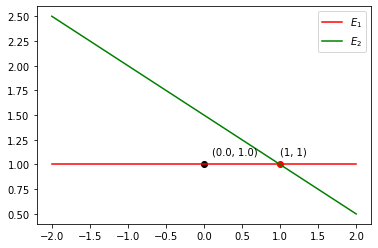

In [7]:
# plot SPL
x = np.linspace(-2, 2)
f1 = 1 + 1e-17*x
f2 = (3 - x)/2
plt.plot(x, f1, color='red', label='$E_1$')
plt.plot(x, f2, color='green', label='$E_2$')

# solusi eliminasi
plt.scatter(sol[0], sol[1], marker='o', color='black')
plt.annotate('({}, {})'.format(sol[0], sol[1]), sol+0.1)

# solusi eksak
plt.scatter(1, 1, marker='o', color='red')
plt.annotate('(1, 1)', (1,1+0.1))

plt.legend();

In [8]:
detA = np.linalg.det(A) # Determinan A
detA

1.0

In [9]:
condition_number = np.linalg.cond(A) # Condition Number A
condition_number

5.828427124746189

Dari Contoh 2 terlihat bahwa condition number dari A adalah 5.8284 mengindikasikan bahwa matriks tersebut __ill-condition__ atau _hampir_ __singular__. Matriks yang ill-condition dapat terjadi karena error pembulatan, sehingga solusi numerik yang dihasilkan salah. Walaupun kita tahu bahwa determinan dari A tak nol artinya SPL pada Contoh 2 memiliki solusi tunggal.

> If the condition number is not too much larger than one, the matrix is well-conditioned, which means that its inverse can be computed with good accuracy. If the condition number is very large, then the matrix is said to be ill-conditioned. Practically, such a matrix is almost singular, and the computation of its inverse, or solution of a linear system of equations is prone to large numerical errors. A matrix that is not invertible has condition number equal to infinity. (https://en.wikipedia.org/wiki/Condition_number)

## Eliminasi Gauss dengan Scaled Partial Pivoting

Untuk menghindari hal tersebut, kita memerlukan __penukaran baris__ di A.

In [10]:
A[[0,1],:] = A[[1,0],:]
b[[0,1]] = b[[1,0]]

print("A = ", A)
print("b = ", b)

A =  [[ 1.e+00  2.e+00]
 [ 1.e-17 -1.e+00]]
b =  [ 3. -1.]


In [11]:
sol = eliminasi_gauss(A, b)
sol

array([1., 1.])

📌 Jadi, kapan kita perlu menukar baris?

Mari kita lihat SPL berikut

$$
\begin{array}{cc}
E_1: a_{11} x_1 + a_{12} x_2 &=& b_1 \\
E_2: a_{21} x_1 + a_{22} x_2 &=& b_2
\end{array}
$$

Asumsikan bahwa kita telah mendapatkan nilai dari $x_2$ dan mengandung error pembulatan (round-off error), $\hat{x}_2 = x_2 + \varepsilon_2$. Kemudian kita hitung $x_1$ dengan $\hat{x}_2$:

$$
\begin{array}{cc}
  \hat{x}_1 &=& \frac{1}{a_{11}}(b_1 - a_{12}\hat{x}_2)\\
            &=& \frac{1}{a_{11}}(b_1 - a_{12}x_2 - a_{12}\varepsilon_2)\\
            &=& \frac{1}{a_{11}}(b_1 - a_{12}x_2) - \frac{a_{12}}{a_{11}} \varepsilon_2\\
            &=& x_1 - \varepsilon_1
\end{array}
$$

dengan demikian kita dapatkan $\varepsilon_1 = \frac{a_{12}}{a_{11}} \varepsilon_2$. Error di $x_2$ terpropagasi dengan suatu faktor $\frac{a_{12}}{a_{11}}$. Kasus ini disebut juga dengan __error terpropagasi (propagated error)__. Untuk menghasilkan hasil yang terbaik, kita menginginkan nilai dari $|a_{11}|$ sebesar mungkin. 


## Algoritma Eliminasi Gauss dengan Scaled Partial Pivoting

Dari kasus tersebut, kita memerlukan teknik __scaled partial pivoting__. Idenya adalah mencari skala terbesar dari masing-masing koefisien di setiap persamaan,  $max_{k \leq i \leq n} |a_{ik}|$ untuk $a_{ii}$, kemudian cari mana baris yang memiliki skala terbesar dan lakukan penukaran baris. Untuk lebih jelasnya, kita lihat algoritma berikut:




```python
Algoritma: Eliminasi_Gauss_Scaled_Pivoting(A, b)

INPUT: A` adalah matriks augmented [A,b], n adalah ukuran dari A.
OUTPUT: variabel x 

1. Mencari skala terbesar dari setiap baris 

for i=1 to n
      s[i] = max(|a[i,j]|), j = 1,2,..,n
      if s[i] == 0
          print('tidak ada solusi tunggal')

for i=1 to n
  2. Mencari indeks dari baris yang memiliki skala terbesar dan lakukan penukaran baris:

  for i=1 to n-1
      p = argmax(|a[k, i]|/s[i]), k = 1,2,...,n (mencari indeks)
      if p ~= i
          A`[[i,p]] <=> A`[[p,i]] (lakukan penukaran baris)
          s[i] <=> s[p] (lakukan penukaran nilai skala)
  3. Selanjutnya, lakukan eliminasi maju seperti pada algoritma sebelumnya.
endfor
4. Lakukan subtitusi mundur.
```

### Contoh 3

Diberikan SPL

$$
\begin{array}{cc}
E_1: & x_1 &+& 2x_2 &+& x_3 &=& 3, \\
E_2: & 3x_1 &+& 4x_2 &+&  &=& 3, \\
E_3: & 2x_1 &+& 10x_2 &+& 4x_3 &=& 10, \\
\end{array}
$$

Dari SPL tersebut, pertama kita cari skala terbesar di setiap baris/persamaan.
Untuk baris pertama $E_1$:

$$
\begin{array}{cc}
s_1 &=& \max_{1 \leq j \leq n} |a_{1j}|\\
     &=& \max \{1, 2, 1\} \\
     &=& 2
\end{array}
$$

baris kedua $E_2$:

$$
\begin{array}{cc}
s_2 &=& \max_{1 \leq j \leq n} |a_{2j}|\\
     &=& \max \{3, 4, 0\} \\
     &=& 4
\end{array}
$$

dan, baris ketiga $E_3$:

$$
\begin{array}{cc}
s_3 &=& \max_{1 \leq j \leq n} |a_{3j}|\\
     &=& \max \{2, 10, 4\} \\
     &=& 10.
\end{array}
$$

Kemudian kita cari baris yang akan ditukar:

$$
\frac{a_{11}}{s_1} = \frac{1}{2}, \frac{a_{21}}{s_2} = \frac{3}{4}, \frac{a_{31}}{s_3} = \frac{2}{10} \rightarrow i=2
$$

dari sini kita dapatkan bahwa baris kedua $E_2$ yang memiliki nilai terbesar. Dengan demikian, lakukan penukaran $E_1 \leftrightarrow E_2$. Sehingga SPLnya menjadi

$$
\begin{array}{cc}
E_1: & 3x_1 &+& 4x_2 &+&  &=& 3, \\
E_2: & x_1 &+& 2x_2 &+& x_3 &=& 3, \\
E_3: & 2x_1 &+& 10x_2 &+& 4x_3 &=& 10, \\
\end{array}
$$

Kemudian kita lakukan eliminasi maju untuk mengeliminasi $x_1$ dari $E_2$ dan $E_3$
* $(E_2 - \frac{1}{3} E_1) \rightarrow (E_2)$
* $(E_3 - \frac{2}{3} E_1) \rightarrow (E_3)$.

Sehingga didapat SPL baru, yaitu

$$
\begin{array}{cc}
E_2: & 3x_1 &+& 4x_2 &+&  &=& 3, \\
E_1: &  && \frac{2}{3}x_2 &+& x_3 &=& 2, \\
E_3: &  && \frac{22}{3}x_2 &+& 4x_3 &=& 8, \\
\end{array}
$$

dan kita cari lagi baris yang akan ditukar dari SPL baru tersebut:

$$
\frac{a_{12}}{s_1} = \frac{2/3}{2} = \frac{1}{3}, \frac{a_{32}}{s_3} = \frac{22/3}{10} = \frac{22}{30} \rightarrow i=3
$$

sehingga kita tukar $E_1 \leftrightarrow E_3$, maka didapat SPL baru selanjutnya

$$
\begin{array}{cc}
E_2: & 3x_1 &+& 4x_2 &+&  &=& 3, \\
E_3: &  && \frac{22}{3}x_2 &+& 4x_3 &=& 8, \\
E_1: &  && \frac{2}{3}x_2 &+& x_3 &=& 2, \\
\end{array}
$$

dan lakukan eliminasi maju untuk mengeliminasi $x_2$ dari $E_1$:
* $(E_1 - \frac{1}{11} E_3) \rightarrow (E_1)$

sehingga didapatkan SPL:

$$
\begin{array}{cc}
E_2: & 3x_1 &+& 4x_2 &+&  &=& 3, \\
E_3: &  && \frac{22}{3}x_2 &+& 4x_3 &=& 8, \\
E_1: &  &&  && \frac{7}{11}x_3 &=& \frac{14}{11}, \\
\end{array}
$$

Kemudian lakukan subtitusi mundur, sehingga didapatkan $x_1 = 1, x_2 = 0, x_3 = 2$.




In [12]:
def eliminasi_gauss_pivoting(A,b):
  A_c = np.c_[A,b]

  n = len(A)

  s = np.zeros(n)
  # Mencari skala terbesar
  for i in range(n):
    s[i] = max(np.abs(A_c[i,:n]))

  for i in range(n):
    # Lakukan penukaran baris
    for k in range(n-1):
      p = np.argmax(np.abs(A_c[k:n, k])/s[k:n]) + k
      if p != k:
        A_c[[k,p],:] = A_c[[p,k],:]
        s[k], s[p] = s[p], s[k]
    
    # Lakukan eliminasi maju
    faktor = A_c[i+1:, i]/A_c[i,i]
    A_c[i+1:] -= faktor[:, np.newaxis] * A_c[i]

  x = np.zeros_like(b, dtype=np.float64)

  # Lakukan subtitutsi mundur
  x[-1] = A_c[-1,-1]/A_c[-1,-2]
  for i in range(n-2, -1, -1):
    x[i] = 1/A_c[i,i] * (A_c[i,-1] - np.dot(A_c[i,i:-1], x[i:]))
    
  return x

In [13]:
A = np.array([[1,2,1],
              [3,4,0],
              [2,10,4]], dtype=np.double)
b = np.array([3,3,10], dtype=np.double)

In [14]:
eliminasi_gauss_pivoting(A,b)

array([1., 0., 2.])

### Contoh 4
Dari Contoh 2, kita gunakan scaled partial pivoting

In [15]:
A = np.array([[1e-17, -1],
              [1,2]], dtype=np.float64)
b = np.array([-1, 3], dtype=np.float64)

In [16]:
x_pivoting = eliminasi_gauss_pivoting(A,b)
x_pivoting

array([1., 1.])

### Contoh 5

$$
\begin{array}{cc}
E_1: & x_1 &+& 10^{17}x_2 &=& 10^{17}, \\
E_2: & x_1 &+& 10^{-17}x_2 &=& 1, \\
\end{array}
$$

In [17]:
A = np.array([[1, 1e17],
             [1, 1e-17]], dtype=np.double)
b = np.array([1e17, 1], dtype=np.double)

In [18]:
np.linalg.cond(A)

9.999999999999997e+16

In [19]:
np.linalg.det(A)

-1.000000000000001e+17

In [20]:
x = eliminasi_gauss(A,b)
x

array([0., 1.])

In [21]:
x_pivoting = eliminasi_gauss_pivoting(A, b)
x_pivoting

array([1., 1.])

In [25]:
rankA = np.linalg.matrix_rank(A, tol=1e-17)
rankA

2